# Mise en application 2 : Entraînez votre premier k-NN
## 1. Intro et data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

data_path = "~/Documents/openclassroom/Fomation_ingenieur_ML/data/"

Pour afficher l'image (le chiffre) à partir du dataset mnist, j'ai construit la fonction suivante :


In [2]:
def show_number(mnist_datum):
    tmp = 1 - mnist_datum.copy()
    pixels = tmp.reshape(28,28)
    plt.imshow(pixels, cmap='gray')
    plt.show()

Dans le cours, il était proposé d'utiliser :

<code>from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)</code>

Mais la RAM de mon PC ne semblait pas suffisante, j'ai donc été sur le dépôt pour télécharger le csv (https://www.openml.org/d/554) .. mais le csv était pas pratique (transforme le bunch en pandas ...) 



In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>
(70000, 784)


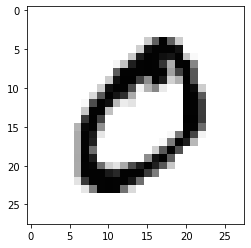

In [4]:
print(type(mnist))
print(type(mnist.data))
print(mnist.data.shape)
show_number(mnist.data[1])

On réduit le jeu de donnée à une taille plus petite pour que notre exemple tourne en temps suffisamment petit, et on sépare en train/test :

In [5]:
# sample = np.random.randint(70000, size=5000)
sample = np.sort(np.random.choice(mnist.data.shape[0], size=7000, replace=False))

data = mnist.data[sample]
target = mnist.target[sample]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, train_size=0.8)

## 2. Construction du modèle knn de base : 
Enfin, on passe au KNN : 

In [6]:
from sklearn import neighbors
knn_model = neighbors.KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train,y_train)
knn_model.predict(X_test[0:2])

array(['2', '1'], dtype=object)

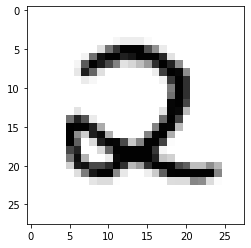

2


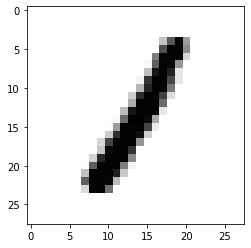

1


array(['2', '1'], dtype=object)

In [7]:
for k in range(2):
    show_number(X_test[k])
    print( y_test[k])
knn_model.predict(X_test[0:2])

## 3. Construction du knn avec choix du k : (par lecture de l'erreur) 
Ok, on a donc la base pour avancer : un modèle des k plus proche voisins qui tourne. Maintenant, pour ce premier jet, j'avais fixé k=3, mais c'est un hyperparamètre : faisons le varier, et comparons les résultats avec l'attribut "score" de la classe 

In [8]:
knn_model.score(X_test[1:10], y_test[1:10])
# help(neighbors.KNeighborsClassifier.score)

0.6666666666666666

On fait varier les valeurs de k dans le range(2,17) :

In [9]:
errors = []
k_values = range(2,17)
for k in k_values:
    knn_model = neighbors.KNeighborsClassifier(n_neighbors = k)
    errors.append(1-knn_model.fit(X_train,y_train).score(X_test,y_test))


Puis on regarde le graphe de l'erreur en fonction de k :

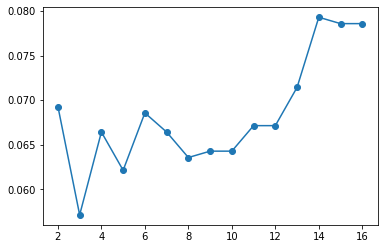

In [10]:
plt.plot(k_values,errors,'o-')    
plt.show()

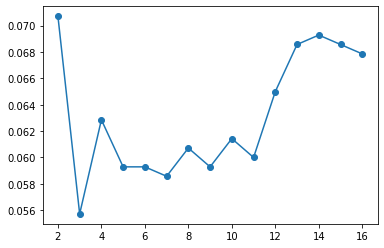

In [11]:
plt.plot(k_values,errors,'o-')    
plt.show()

L'erreur comise par les knn sur ce sample est minimale pour 3 classes. 

## 3. Extension du TP :

Dans le cours, il est proposé d'aller plus loin, et il y a entre autre une autre version pour afficher qui est présenter. Je vais la reprendre. 

On choisit de prendre k=3 parce que c'est la "meilleure prédiction" (dans quel sens ? quelle mesure ?) 

In [ ]:
# On récupère le classifieur le plus performant
k = 3
knn = neighbors.KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train,y_train)

# On récupère les prédictions sur les données test
predicted = knn.predict(X_test)

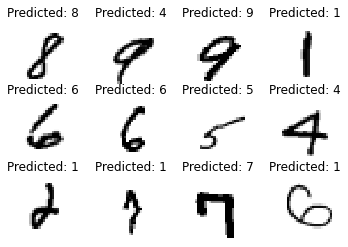

In [28]:
# On redimensionne les données sous forme d'images
images = X_test.reshape((-1, 28, 28))

# On selectionne un echantillon de 12 images au hasard
select = np.random.randint(images.shape[0], size=12)

# On affiche les images avec la prédiction associée
fig,ax = plt.subplots(3,4)
for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format( predicted[value]) )

plt.show()

nb1 : ici, est utilisée "randint" pour sortir au hasard 12 éléments, mais j'ai préféré utiliser choice par qu'il ne permet pas les répétition (ce qui a peut d'importance ici, comme on a beaucoup d'images, il y a peu de chances de tomber 2 fois sur la même)

nb2 : découverte de "enumerate" (doc = "Donne un objet énumérant. iterable doit être une séquence, un iterator, ou tout autre objet supportant l’itération. La méthode __next__() de l’itérateur donné par enumerate() donne un tuple contenant un compte (démarrant à start, 0 par défaut) et les valeurs obtenues de l’itération sur iterable.")


Ensuite, il est proposé d'isoler quelques erreurs comises pour chercher à comprendre les erreurs comises

In [29]:
# on récupère les données mal prédites 
misclass = (y_test != predicted)
misclass_images = images[misclass,:,:]
misclass_predicted = predicted[misclass]

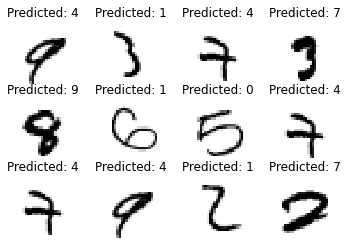

In [30]:
# on sélectionne un échantillon de ces images
select = np.random.randint(misclass_images.shape[0], size=12)

# on affiche les images et les prédictions (erronées) associées à ces images
for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(misclass_images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format(misclass_predicted[value]) )

plt.show()

Donc, en ne regardant que les 3 points les plus 'proches', les chiffres déformés sont manqués (errreurs courantes 7-4, 7-2 ...)